# CHARACTER RECOGNITION#
 ### The aim of this project is to create online character recognition system. By considering new english learners or childs who are in school and trying to write alphabate from A-Z and no system to check 


In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
tf.compat.v1.enable_eager_execution()

In [13]:
!wget -O imagedata.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv

--2020-02-02 09:29:47--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1776 (1.7K) [text/plain]
Saving to: ‘imagedata.csv’

100%[======================================>] 1,776       --.-K/s   in 0s      

2020-02-02 09:29:47 (20.8 MB/s) - ‘imagedata.csv’ saved [1776/1776]



In [14]:
!wget -O images.zip https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip

--2020-02-02 09:29:49--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1828109 (1.7M) [application/zip]
Saving to: ‘images.zip’

100%[======================================>] 1,828,109   --.-K/s   in 0.05s   

2020-02-02 09:29:49 (35.8 MB/s) - ‘images.zip’ saved [1828109/1828109]



In [15]:
from zipfile import ZipFile

image = ZipFile('images.zip')
image.extractall('images')


In [16]:
!ls

character_reg.pkl  imagedata.csv  images  images.zip


In [17]:
import pandas as pd
df=pd.read_csv("imagedata.csv")

In [18]:
df.head()

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg


In [19]:

df[df.path != 'a7.jpg']

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg
5,0,a6.jpg
7,1,b1.jpg
8,1,b2.jpg
9,1,b3.jpg
10,1,b4.jpg


In [20]:
import os
os.listdir("images/images")

['f5.jpg',
 'l1.jpg',
 'e1.jpg',
 'r2.jpg',
 'h3.jpg',
 'r7.jpg',
 'm5.jpg',
 't6.jpg',
 'c1.jpg',
 'g4.jpg',
 'e2.jpg',
 'g1.jpg',
 'x2.jpg',
 'l3.jpg',
 'g6.jpg',
 'd5.jpg',
 'e4.jpg',
 'm2.jpg',
 's5.jpg',
 'm1.jpg',
 'b7.jpg',
 's2.jpg',
 'v3.jpg',
 'd7.jpg',
 'k7.jpg',
 't5.jpg',
 'h5.jpg',
 'k1.jpg',
 'v1.jpg',
 'p5.jpg',
 'k2.jpg',
 'g7.jpg',
 'v2.jpg',
 'u1.jpg',
 'n3.jpg',
 'e7.jpg',
 'k5.jpg',
 'i7.jpg',
 'f4.jpg',
 'v5.jpg',
 'r3.jpg',
 'n1.jpg',
 'y2.jpg',
 'p7.jpg',
 's3.jpg',
 't4.jpg',
 'b2.jpg',
 'l7.jpg',
 'p2.jpg',
 'i4.jpg',
 'w1.jpg',
 'l2.jpg',
 'w5.jpg',
 'd6.jpg',
 'i5.jpg',
 'j3.jpg',
 'k3.jpg',
 'o7.jpg',
 'e6.jpg',
 'w4.jpg',
 'p1.jpg',
 'j5.jpg',
 'n4.jpg',
 'd2.jpg',
 'p3.jpg',
 'r6.jpg',
 'n7.jpg',
 'b5.jpg',
 'c4.jpg',
 'p4.jpg',
 'f1.jpg',
 'i6.jpg',
 'f6.jpg',
 'l6.jpg',
 'o6.jpg',
 'a1.jpg',
 'v4.jpg',
 'c6.jpg',
 'h6.jpg',
 'g3.jpg',
 'k4.jpg',
 'h7.jpg',
 'b3.jpg',
 'u2.jpg',
 'h1.jpg',
 'r5.jpg',
 'z4.jpg',
 'b4.jpg',
 'o5.jpg',
 'f7.jpg',
 'i3.jpg',

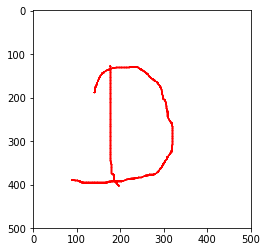

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/images/d1.jpg')

plt.imshow(img, cmap='gray')

In [22]:

image_path = df["path"].tolist()

In [23]:
from tensorflow.keras.preprocessing import image as tf_img

In [24]:
train_image = []
for image_name in image_path:
    img = tf_img.load_img('images/images/'+image_name, target_size=(28,28,1), grayscale=True)
    img = tf_img.img_to_array(img)
    img = img/255 # Normalization
    train_image.append(img)
X = np.array(train_image)

/opt/conda/envs/Python36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [25]:
y = df['label'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 133 samples, validate on 34 samples
Epoch 1/10
133/133 [==============================] - 3s 26ms/sample - loss: 1.6600 - acc: 0.5338 - val_loss: 3.8303 - val_acc: 0.1176
Epoch 2/10
133/133 [==============================] - 2s 15ms/sample - loss: 1.4444 - acc: 0.6241 - val_loss: 3.9395 - val_acc: 0.1176
Epoch 3/10
133/133 [==============================] - 1s 11ms/sample - loss: 1.4199 - acc: 0.5714 - val_loss: 3.9458 - val_acc: 0.1471
Epoch 4/10
133/133 [==============================] - 1s 10ms/sample - loss: 1.1950 - acc: 0.6917 - val_loss: 4.0355 - val_acc: 0.1471
Epoch 5/10
133/133 [==============================] - 1s 10ms/sample - loss: 1.1648 - acc: 0.7293 - val_loss: 4.4253 - val_acc: 0.1176
Epoch 6/10
133/133 [==============================] - 1s 11ms/sample - loss: 0.9742 - acc: 0.7444 - val_loss: 4.7961 - val_acc: 0.0882
Epoch 7/10
133/133 [==============================] - 1s 10ms/sample - loss: 0.9026 - acc: 0.7820 - val_loss: 4.8751 - val_acc: 0.1176
Epoch 8/10

In [33]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model)

TypeError: can't pickle _thread.RLock objects

In [ ]:
!pip install dropbox

In [ ]:
file_from = 'character_reg.pkl'
file_to = '/DataScience/character_reg.pkl'
def upload_file(file_from, file_to):
    dbx = dropbox.Dropbox("JyxifLrBT50AAAAAAABRz4jQqYWU5KKmghjZSCqru8vwSIBj8ZJpnZQ08e-m17Us")
    f = open(file_from, 'rb')
    dbx.files_upload(f.read(), file_to)
upload_file(file_from,file_to)v

In [28]:
img = tf_img.load_img('images/images/'+"d7.jpg", target_size=(28,28,1), grayscale=True)
img = tf_img.img_to_array(img)
img = img/255
model.predict_classes([[img]])

array([3])

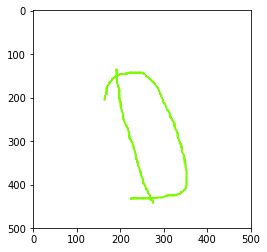

In [31]:
img = mpimg.imread('images/images/d7.jpg')

plt.imshow(img, cmap='gray')